In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
#reading the .csv file as a dataframe (df)
data=pd.read_csv('zoo.data')

In [3]:
#outputing first 10 lines of df
data.head(10)

,animal_name,hair(b),feathers(b),eggs(b),milk(b),airborne(b),aquatic(b),predator(b),toothed(b),backbone(b),breathes(b),venomous(b),fins(b),legs(n),tail(b),domestic(b),catsize(b),type(n)
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


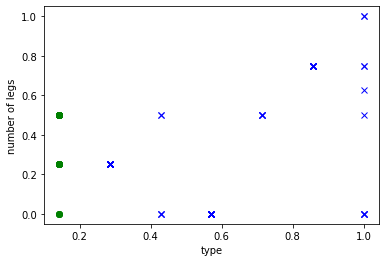

In [38]:
#building a bar chart of the dependence of the presence of heart disease on age
has_milk=[]
hsnt_milk=[]
import matplotlib.pyplot as plt
m=len(data['animal_name'])
tmax=data['type(n)'].max()
lmax=data['legs(n)'].max()
for i in range(m):
    if data['milk(b)'][i]:
        has_milk.append([(data['type(n)'][i])/tmax, (data['legs(n)'][i])/lmax])
    else: hsnt_milk.append([(data['type(n)'][i])/tmax, (data['legs(n)'][i])/lmax])
has_milk=np.array(has_milk)
hsnt_milk=np.array(hsnt_milk)
plt.plot(has_milk[:, 0], has_milk[:, 1], 'go', hsnt_milk[:, 0], hsnt_milk[:, 1], 'bx')
#In this graph, those who have milk correspond to green circles, 
#and those who do not have it correspond to a blue crosses
plt.xlabel('type')
plt.ylabel('number of legs')
plt.show()

### h(x)=g(a+b*x1+c*x2), where g(z)=1/(1+e^(-z))

In [39]:
def h(X, theta):
    lst=[]
    for j in range(len(X)): 
        lst.append(1/(1+math.exp(-np.dot(X[j], np.transpose(theta)))))
    return lst

In [50]:
def graddesc(X, Y, m, alpha, theta):
    
    a=theta[0]
    b=theta[1]
    c=theta[2]
    
    suma_list = (h(X, theta) - Y)*X[:, 0]
    suma = np.sum(suma_list)
    sumb_list = (h(X, theta) - Y)*X[:, 1]
    sumb = np.sum(sumb_list)
    sumc_list = (h(X, theta) - Y)*X[:, 2]
    sumc = np.sum(sumc_list)
    
    if (abs(alpha*suma)>0.005 or abs(alpha*sumb)>0.005) or abs(alpha*sumc)>0.005:
        a -= alpha*suma
        b -= alpha*sumb
        c -= alpha*sumc
        return graddesc(X, Y, m, alpha, [a, b, c])
    
    else:
        return [a, b, c]

In [41]:
theta = np.asarray([100, 100, 200])
theta

array([100, 100, 200])

In [42]:
X=np.hstack((np.reshape(np.ones(m), (m,1)), np.vstack((has_milk, hsnt_milk))))
X[78:85]

array([[1.        , 0.28571429, 0.25      ],
       [1.        , 1.        , 1.        ],
       [1.        , 0.57142857, 0.        ],
       [1.        , 0.42857143, 0.        ],
       [1.        , 1.        , 0.        ],
       [1.        , 0.28571429, 0.25      ],
       [1.        , 0.28571429, 0.25      ]])

In [43]:
np.hstack(([[1],[1],[1]], [[2,3],[4,5],[6,7]]))

array([[1, 2, 3],
       [1, 4, 5],
       [1, 6, 7]])

In [44]:
Y=np.hstack((np.ones(len(has_milk)), np.zeros(len(hsnt_milk))))
Y[:7]

array([1., 1., 1., 1., 1., 1., 1.])

In [51]:
coef = graddesc(X, Y, m, 0.15, theta)
coef

[17.870648362516704, -104.05043973934188, 27.42606545617355]

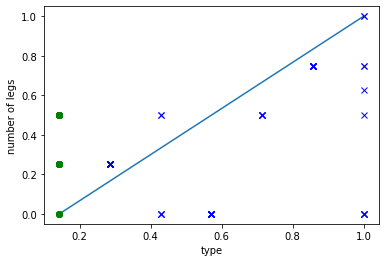

In [52]:
x_axes=[data['type(n)'].min()/data['type(n)'].max(), 1]
y_axes=[data['legs(n)'].min()/data['legs(n)'].max(), 1]
z_axes=[coef[0]+coef[1]*x_axes[i]+coef[2]*y_axes[i] for i in range(2)]
plt.plot(x_axes, y_axes)
plt.plot(has_milk[:, 0], has_milk[:, 1], 'go', hsnt_milk[:, 0], hsnt_milk[:, 1], 'bx')
#In this graph, those who have milk correspond to green circles, 
#and those who do not have it correspond to a blue crosses
plt.xlabel('type')
plt.ylabel('number of legs')
plt.show()